In [1]:
# load necessary libraries
import numpy as np
from scipy import ndimage
from scipy import misc
from scipy import stats
from scipy.ndimage.filters import gaussian_filter as gf

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle as Rec

from skimage import filters
from skimage import transform as tf

import csv
import json
import random
import urllib
import cStringIO
# import cv2
from PIL import Image

from projEdgeBreaks import *
from imageModifiers import *
from saveImages import *

# change plot size
mpl.rcParams['figure.figsize'] = (15, 15)

In [2]:
# get the list of image urls from the csv
imgUrl = []
with open("data/decoding-the-civil-war-subjects-9-29-17.csv") as f:
    red = csv.reader(f)
    first = red.next()
    print(first)
    loc = first.index("locations")
    
    for row in red:
        rw = json.loads(row[loc])
        imgUrl.append(rw["0"])

['subject_id', 'project_id', 'workflow_id', 'subject_set_id', 'metadata', 'locations', 'classifications_count', 'retired_at', 'retirement_reason']


In [3]:
random.seed(53)
slopeL = random.sample(imgUrl, 10)

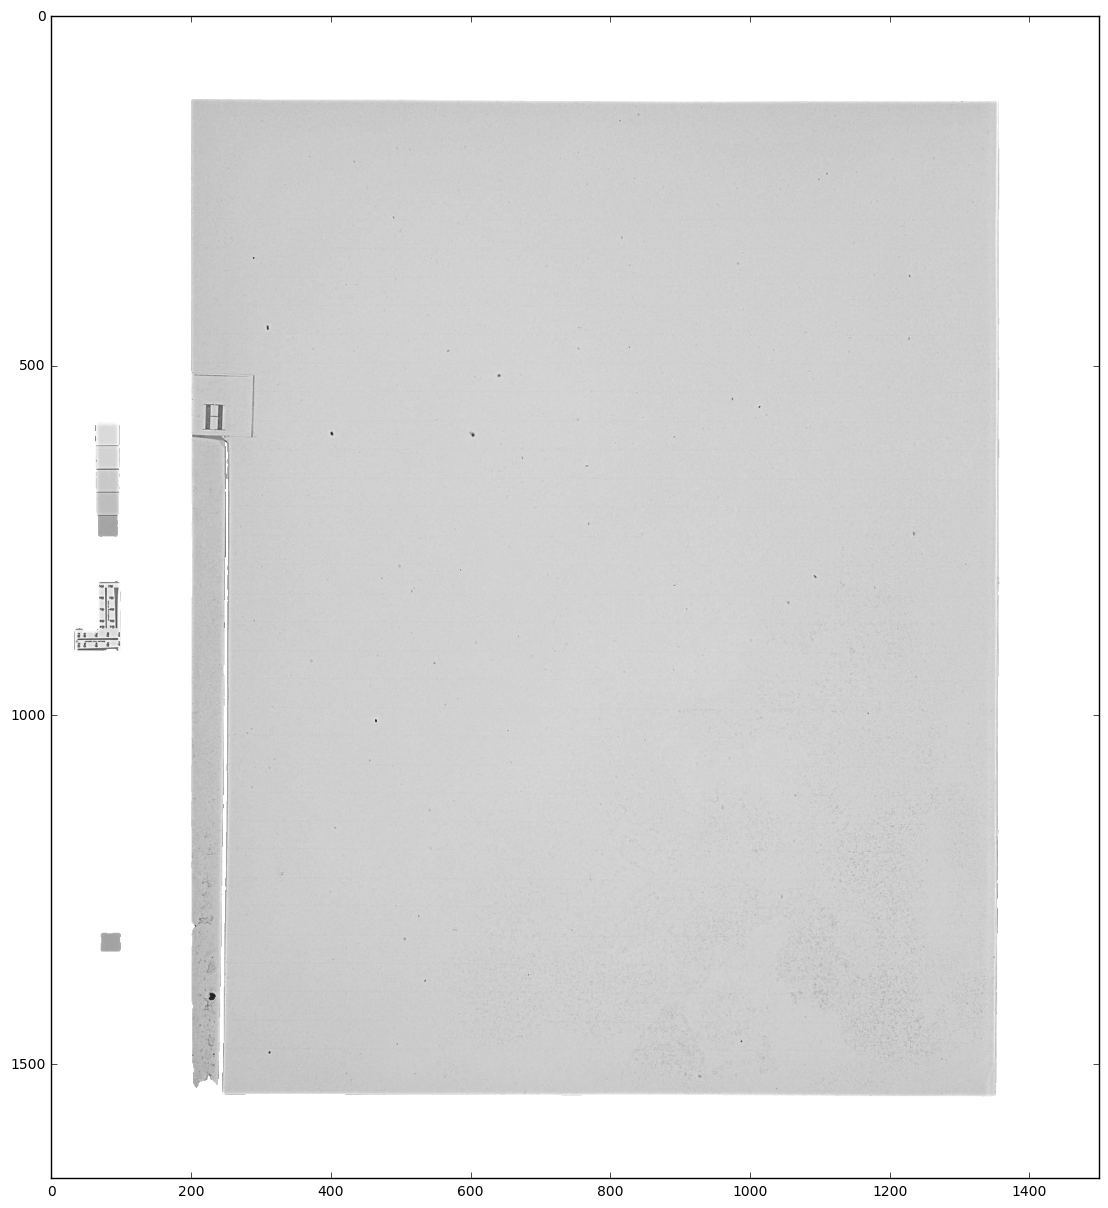

In [8]:
let, grey = readImg(slopeL[0], plotIt=False)
let, grey = removeEdges(let, grey)
grey = whitenEdgesFilter(grey)
plt.imshow(grey, cmap = "gray")
plt.show()

In [ ]:
# some parameters for testing #######################################
plotImg = False
fname = "images/medium1.png"
outFname = "medium1"


# read in and do all pre-processing #################################
let, grey = readImg(fname, plotIt=plotImg)
let, grey = removeEdges(let, grey, rmThresh=0)
grey = whitenEdgesProject(grey)
greyBi = binarizeImg(grey, biThresh="otsu", plotIt=plotImg)
greySm = smoothImg(grey, smoothSigma=5.0, plotIt=plotImg)
greyBiSm = smoothImg(greyBi, smoothSigma=5.0, plotIt=plotImg)


# get linebreaks ####################################################
lb = projBreaks(greyBiSm, "y")

saveLines(let, outFname+"_line", lb, folder = "./line_img/")